# Построение дерева с данным набором степеней вершин

В одной из предыдущих задач мы разобрали несколько заданий, в которых нужно было по данному набору чисел понять, можно ли построить дерево с соответствующими степенями вершин. Мы знаем, что есть несколько препятствий к тому, чтобы такое дерево существовало (степени должны быть положительны, их сумма должна быть равна $2n-2$, где $n$ — число вершин). Если же эти ограничения были удовлетворены, нам удавалось построить такое дерево. Оказывается, что указанные ограничения единственно возможные, и если эти условия для набора выполнены, то дерево всегда существует!

В этом ноутбуке мы опишем как построить дерево с данной последовательностью степеней вершин, если такое дерево существует. Попробуйте разобраться с этим кодом, и понять, как он работает.

In [1]:
# Здесь мы загружаем библиотеку для работы с графами

import networkx as nx

In [2]:
# Эта функция будет по данному списку чисел строить дерево с соответствующими степенями вершин

def create_tree(degrees):
    n = len(degrees)
    # Здесь мы проверяем условия, которым должен удовлетворять набор чисел
    if any([elem <= 0 for elem in degrees]) or sum(degrees) != 2 * n - 2:
        return None

    # Здесь мы заводим граф и заводим вершины в нем
    graph = nx.Graph()
    graph.add_nodes_from(range(n))
    for _ in range(n - 1):
        # Выбираем какую-нибудь вершину степени 1
        i = degrees.index(1)
        # Выбираем вершину максимальной степени 
        # Команда zip создает набор пар, в которых i-ый элемент первого списка образует пару с i-ым элементом второго списка
        # max возвращает максимальный элемент списка; в нашем случае он вернет пару, максимальную в лексикографическом порядке
        j = max(zip(degrees, range(n)))[1]
        graph.add_edge(i, j)
        degrees[i] -= 1
        degrees[j] -= 1

    return graph

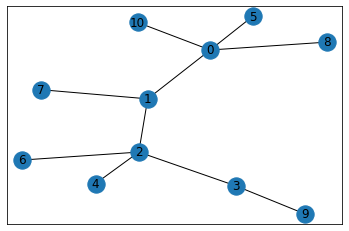

In [3]:
G = create_tree([4, 3, 4, 2, 1, 1, 1, 1, 1, 1, 1])
nx.draw_networkx(G)

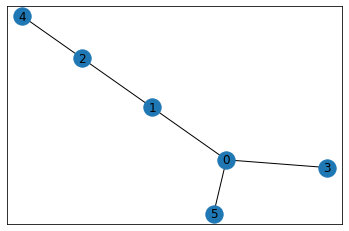

In [4]:
G = create_tree([3,2,2,1,1,1])
nx.draw_networkx(G)